In [1]:
import pandas as pd

first_data = pd.read_csv('./dataset/project/wine_w.csv', sep=';')
ft = first_data.copy()
ft

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
ft = ft.drop_duplicates()

In [3]:
from sklearn.preprocessing import StandardScaler

features = ft.iloc[:, :-1]

std = StandardScaler()
std_features = std.fit_transform(features)
std_under_h_df = pd.DataFrame(std_features, columns=features.columns)

for column in std_under_h_df.columns:
    std_under_h_df.drop(
        std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)

for column in std_under_h_df.columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')


fixed acidity: 0건
volatile acidity: 0건
citric acid: 0건
residual sugar: 0건
chlorides: 0건
free sulfur dioxide: 0건
total sulfur dioxide: 0건
density: 0건
pH: 0건
sulphates: 0건
alcohol: 0건


In [4]:
ft = ft.iloc[std_under_h_df.index].reset_index(drop=True)
ft

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
3,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
4,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2670,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
2671,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
2672,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
2673,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
ft['quality'].value_counts()

quality
6    1278
5     713
7     510
8      90
4      73
3       7
9       4
Name: count, dtype: int64

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

features, targets = ft.iloc[:, :-1], ft.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(k_neighbors=2, random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dtc.fit(X_train_over.values, y_train_over.values)



evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

quality
5    1022
6    1022
7    1022
3    1022
8    1022
4    1022
9    1022
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    # auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

dtc_parameter = {'max_depth':[2,3,4], 'min_samples_split':[300,500,700]}
svc_parameter = {'svc__C' : [0.01,0.1,1], 'svc__gamma' : [0.01,0.1,1], 'svc__kernel' : ['linear', 'rbf']}
knn_c_parameter = {'knn__n_neighbors' : [3,5,7,9,11]}
rfc_parameters = {
    'rfc__max_depth': [1, 2, 3],
    'rfc__min_samples_split': [6, 12, 18, 24]
}
ada_parmeters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

gbc_parameters = {
    'gbc__n_estimators': [ 25,70,100,120],
    'gbc__learning_rate': [0.2,0.5, 0.7, 1]
}

xgb_parameters = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__learning_rate': [0.4, 0.7, 1]
}
lgbm_parameters = {
    'lgbm__n_estimators': [ 20,40,70,100,],
    'lgbm__learning_rate': [0.2,0.4, 0.6, 1]
}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier(loss='log_loss')
xgb = XGBClassifier()
lgbm = LGBMClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameter, cv=5, refit=True, return_train_score=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameter, cv=3, refit=True, return_train_score=True , n_jobs=-1)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameter, cv=3, refit=True, return_train_score=True , n_jobs=-1)

rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=3, n_jobs=-1)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
g_ada = GridSearchCV(ada_pipe, param_grid=ada_parmeters, cv=3, n_jobs=-1)

gbc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbc', gbc)])
g_gbc = GridSearchCV(gbc_pipe, param_grid=gbc_parameters, cv=3, n_jobs=-1)

xgb_pipe = Pipeline([('standard_scaler', StandardScaler()), ('xgb', xgb)])
g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)


lgbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('lgbm', lgbm)])
g_lgbm = GridSearchCV(lgbm_pipe, param_grid=lgbm_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)



In [8]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [300, 500, 700]},
             return_train_score=True)

In [96]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [37]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [38]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [1, 2, 3],
                         'rfc__min_samples_split': [6, 12, 18, 24]})

In [39]:
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

In [40]:
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbc', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gbc__learning_rate': [0.2, 0.5, 0.7, 1],
                         'gbc__n_estimators': [25, 70, 100, 120]})

In [41]:
g_lgbm.fit(X_train_over, y_train_over, lgbm__eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 7154, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.2, 0.4, 0.6, 1],
                         'lgbm__n_estimators': [20, 40, 70, 100]},
             return_train_score=True)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 2, 'min_samples_split': 300}",0.389851,7
1,"{'max_depth': 2, 'min_samples_split': 500}",0.389851,7
2,"{'max_depth': 2, 'min_samples_split': 700}",0.389851,7
3,"{'max_depth': 3, 'min_samples_split': 300}",0.494268,4
4,"{'max_depth': 3, 'min_samples_split': 500}",0.494268,4
5,"{'max_depth': 3, 'min_samples_split': 700}",0.494268,4
6,"{'max_depth': 4, 'min_samples_split': 300}",0.536481,1
7,"{'max_depth': 4, 'min_samples_split': 500}",0.534664,2
8,"{'max_depth': 4, 'min_samples_split': 700}",0.534664,2


오차 행렬
[[  0   1   0   0   0   0   0]
 [  0   7   5   1   1   0   0]
 [ 28  32  73   2   1   7   0]
 [ 35  21 101  39   9  50   1]
 [ 12   5  20  12  13  37   3]
 [  1   0   6   1   4   6   0]
 [  0   0   0   0   0   1   0]]
정확도: 0.2579, 정밀도: 0.2421, 재현율: 0.2319, F1: 0.1637
################################################################################


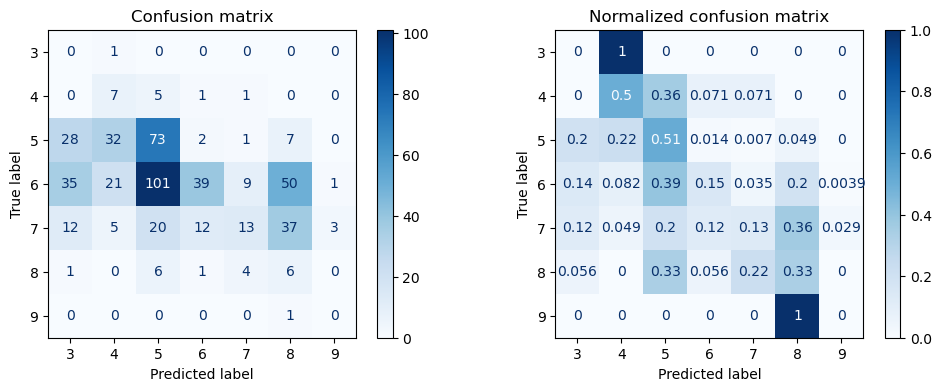

In [9]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)
get_evaluation(y_test, prediction, dtc, X_test)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.553815,12
1,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.364547,18
2,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.553815,12
3,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.545569,15
4,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.553815,12
5,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.374758,17
6,"{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...",0.569053,9
7,"{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...",0.535225,16
8,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.569053,9
9,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.701565,3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[  0   0   0   1   0   0   0]
 [  0   2   1  11   0   0   0]
 [  0   1  45  91   6   0   0]
 [  0   1  24 212  18   1   0]
 [  0   0   2  72  27   1   0]
 [  0   0   0  15   2   1   0]
 [  0   0   0   1   0   0   0]]
정확도: 0.5364, 정밀도: 0.3563, 재현율: 0.2294, F1: 0.2468
################################################################################


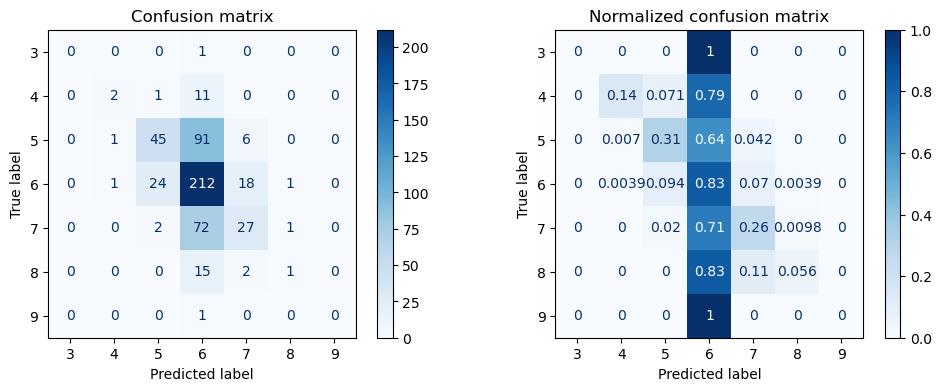

In [97]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

svc = g_svc.best_estimator_
prediction = svc.predict(X_test)
get_evaluation(y_test, prediction, svc, X_test)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.811154,1
1,{'knn__n_neighbors': 5},0.788790,2
2,{'knn__n_neighbors': 7},0.768242,3
3,{'knn__n_neighbors': 9},0.759295,4
4,{'knn__n_neighbors': 11},0.750210,5


오차 행렬
[[ 0  0  1  0  0  0  0]
 [ 0  6  3  4  1  0  0]
 [ 2 16 76 31 13  5  0]
 [ 2 18 73 83 65 15  0]
 [ 0  0 11 21 53 17  0]
 [ 0  0  1  4  6  6  1]
 [ 0  0  0  0  1  0  0]]
정확도: 0.4187, 정밀도: 0.2446, 재현율: 0.3053, F1: 0.2526
################################################################################


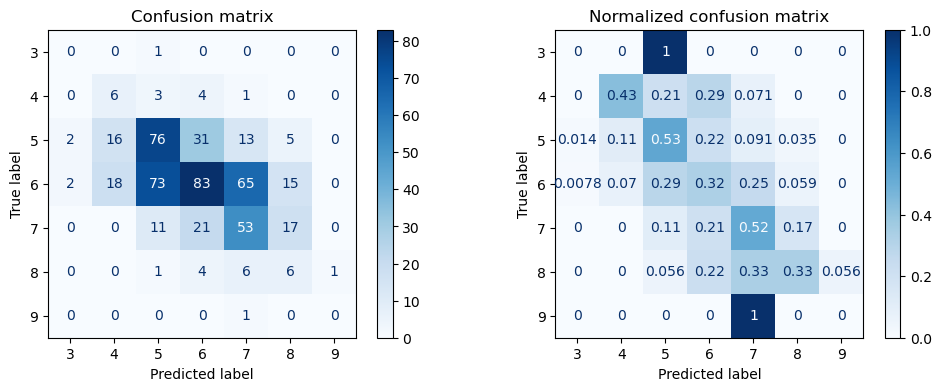

In [43]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

knn = g_knn.best_estimator_

prediction = knn.predict(X_test)
get_evaluation(y_test, prediction, knn, X_test)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.375733,9
1,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.372098,11
2,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.371678,12
3,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.373635,10
4,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.496225,7
5,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.496225,6
6,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.497343,5
7,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.491612,8
8,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.539419,2
9,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.533548,3


오차 행렬
[[ 0  0  1  0  0  0  0]
 [ 4  3  5  0  0  2  0]
 [23 25 73  4  6 12  0]
 [29 18 96  6 38 67  2]
 [14  2 14  4 21 42  5]
 [ 0  0  4  0  2 12  0]
 [ 0  0  0  0  0  1  0]]
정확도: 0.2150, 정밀도: 0.1816, 재현율: 0.2315, F1: 0.1400
################################################################################


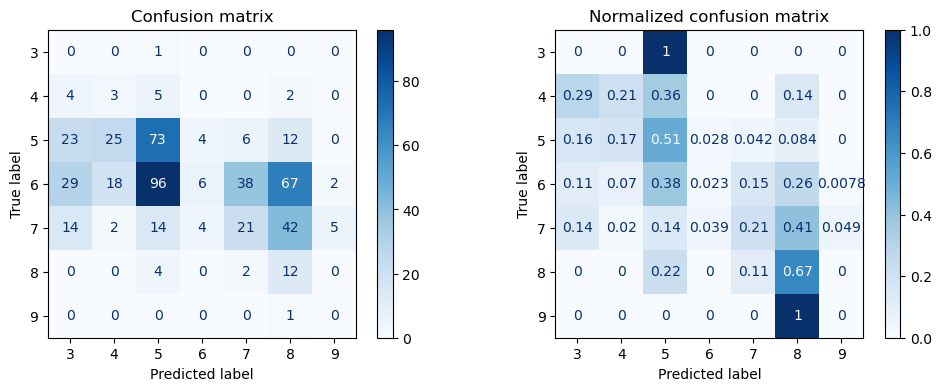

In [44]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

rfc = g_rfc.best_estimator_

prediction = rfc.predict(X_test)
get_evaluation(y_test, prediction, rfc, X_test)

,params,mean_test_score,rank_test_score
0,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.271181,9
1,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.276771,7
2,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.272997,8
3,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.279985,5
4,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.278309,6
5,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.280265,4
6,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.291028,3
7,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.326664,1
8,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.307804,2
9,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.206174,11


오차 행렬
[[  0   1   0   0   0   0   0]
 [  1   9   1   0   3   0   0]
 [  7 110   0   4  14   8   0]
 [ 10 105   3  22  55  61   0]
 [  3  18   0   5  28  47   1]
 [  0   4   0   1   4   9   0]
 [  0   0   0   0   0   0   1]]
정확도: 0.1290, 정밀도: 0.2236, 재현율: 0.3576, F1: 0.1837
################################################################################


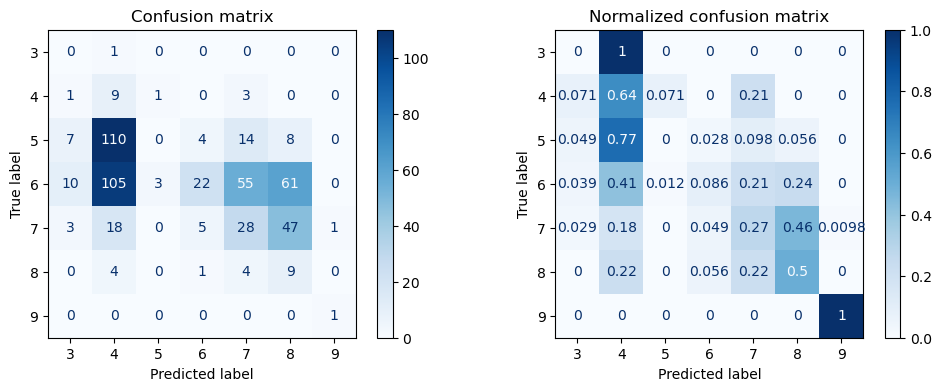

In [45]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)
ada = g_ada.best_estimator_

prediction = ada.predict(X_test)
get_evaluation(y_test, prediction, ada, X_test)

,params,mean_test_score,rank_test_score
0,"{'gbc__learning_rate': 0.2, 'gbc__n_estimators...",0.751471,16
1,"{'gbc__learning_rate': 0.2, 'gbc__n_estimators...",0.798019,11
2,"{'gbc__learning_rate': 0.2, 'gbc__n_estimators...",0.811300,6
3,"{'gbc__learning_rate': 0.2, 'gbc__n_estimators...",0.813256,4
4,"{'gbc__learning_rate': 0.5, 'gbc__n_estimators...",0.783481,13
5,"{'gbc__learning_rate': 0.5, 'gbc__n_estimators...",0.811578,5
6,"{'gbc__learning_rate': 0.5, 'gbc__n_estimators...",0.818149,2
7,"{'gbc__learning_rate': 0.5, 'gbc__n_estimators...",0.822622,1
8,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.775654,14
9,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.802213,10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[  0   0   1   0   0   0   0]
 [  0   4   6   2   2   0   0]
 [  0   7  65  52  16   3   0]
 [  1   3  45 152  42  13   0]
 [  1   3   4  47  41   6   0]
 [  0   0   0  10   7   1   0]
 [  0   0   0   0   0   1   0]]
정확도: 0.4916, 정밀도: 0.2531, 재현율: 0.2559, F1: 0.2535
################################################################################


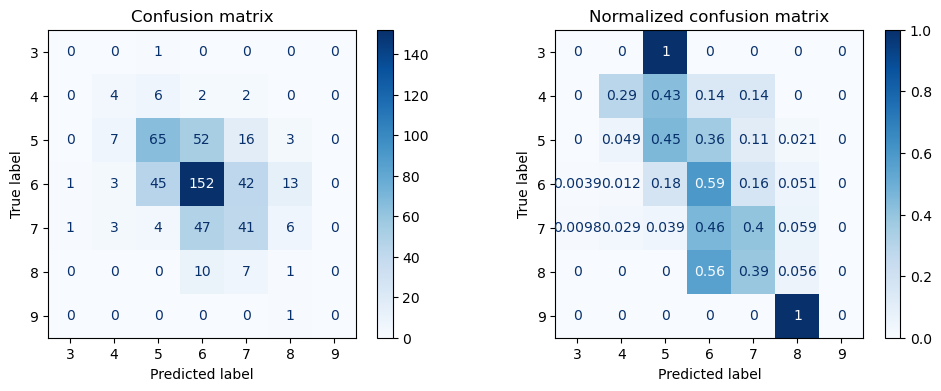

In [46]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)
gbc = g_gbc.best_estimator_

prediction = gbc.predict(X_test)
get_evaluation(y_test, prediction, gbc, X_test)

,params,mean_test_score,rank_test_score
0,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.831568,12
1,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.849600,9
2,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.858825,4
3,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.862320,2
4,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.839816,10
5,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.857149,7
6,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.862041,3
7,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.863578,1
8,"{'lgbm__learning_rate': 0.6, 'lgbm__n_estimato...",0.835342,11
9,"{'lgbm__learning_rate': 0.6, 'lgbm__n_estimato...",0.851696,8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[  0   0   0   1   0   0   0]
 [  0   3   4   7   0   0   0]
 [  0   8  70  59   6   0   0]
 [  0   1  47 168  36   3   1]
 [  0   1   4  59  35   3   0]
 [  0   0   0  10   8   0   0]
 [  0   0   0   0   1   0   0]]
정확도: 0.5159, 정밀도: 0.2501, 재현율: 0.2433, F1: 0.2453
################################################################################


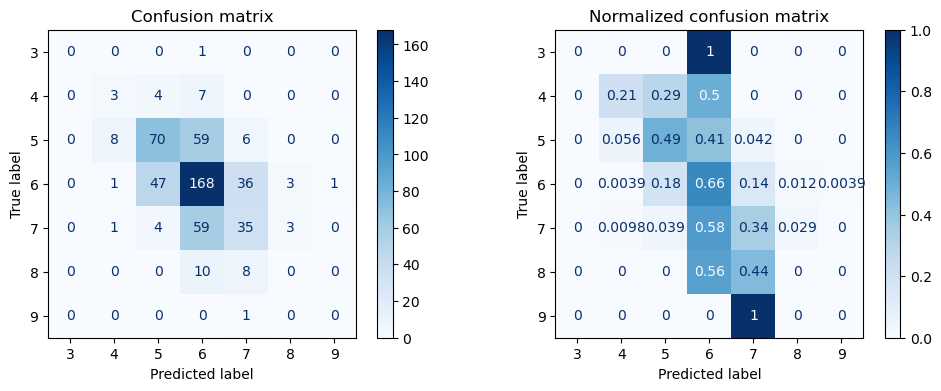

In [48]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)
lgbm = g_lgbm.best_estimator_

prediction = lgbm.predict(X_test)
get_evaluation(y_test, prediction, lgbm, X_test)

In [49]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('dtc', dtc), 
                             ('knn', knn_pipe), 
                             ('rfc', rfc),('ada', ada),('gbc', gbc),('lgbm', lgbm)], 
                 voting='hard', 
                 n_jobs=-1)

In [50]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=1,
                                                     min_samples_split=30000)),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('rfc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('rfc',
                                               RandomForestClassifier(max_depth=3,
                                                                      min_samples_split=18))])),
                             ('ada',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('ada',
                                               AdaBoostClassifier(learning_rate=0.7,
                                                                  n_estimators=100))])),
                             ('gbc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('gbc',
                                               GradientBoostingClassifier(learning_rate=0.5,
                                                                          n_estimators=120))])),
                             ('lgbm',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('lgbm',
                                               LGBMClassifier(learning_rate=0.4))]))],
                 n_jobs=-1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[ 0  0  1  0  0  0  0]
 [ 3  5  3  2  1  0  0]
 [18 22 70 22 10  1  0]
 [25 17 65 96 33 20  0]
 [ 7  3  5 34 39 14  0]
 [ 1  2  1  4  6  4  0]
 [ 0  0  0  0  1  0  0]]
정확도: 0.4000, 정밀도: 0.2469, 재현율: 0.2609, F1: 0.2365
################################################################################


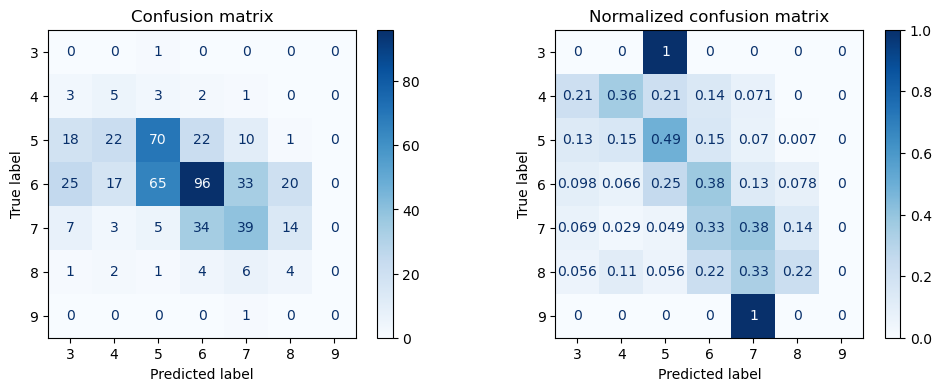

In [51]:
prediction = vc.predict(X_test)
get_evaluation(y_test, prediction, vc, X_test)

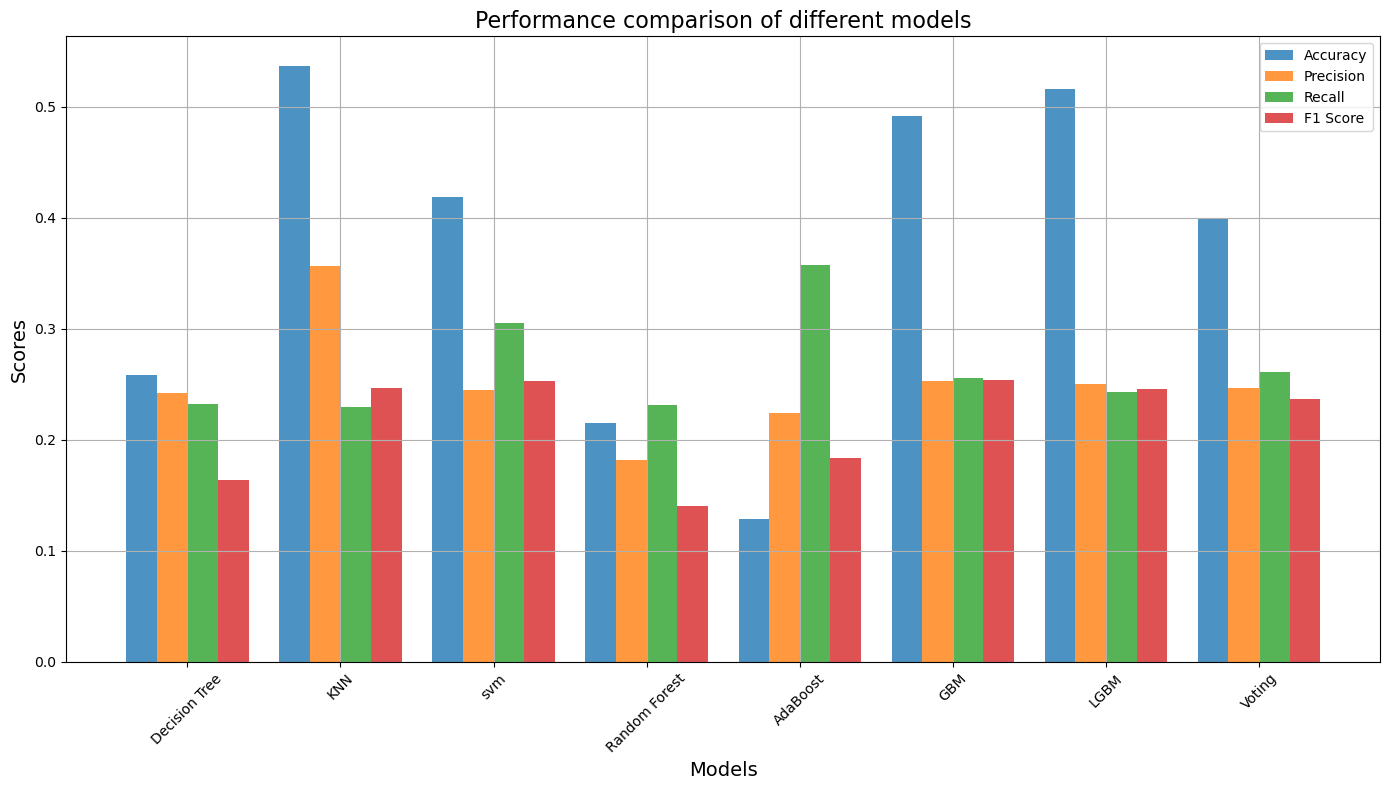

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 모델과 성능 지표를 리스트 형태로 준비
models = [
    "Decision Tree", "KNN",'svm' ,
     "Random Forest", "AdaBoost", 
    "GBM", "LGBM", 'Voting'
]
accuracies = [0.2579, 0.5364, 0.4187, 0.2150, 0.1290, 0.4916, 0.5159, 0.4000]
precisions = [0.2421, 0.3563, 0.2446, 0.1816, 0.2236, 0.2531, 0.2501, 0.2469]
recalls = [0.2319, 0.2294, 0.3053, 0.2315, 0.3576, 0.2559, 0.2433, 0.2609]
f1_scores = [0.1637  , 0.2468  , 0.2526  , 0.1400  , 0.1837  , 0.2535  , 0.2453  , 0.2365 ]

# 데이터를 numpy 배열로 변환
data = np.array([accuracies, precisions, recalls, f1_scores])

# 성능 지표의 이름
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# 그래프 그리기 설정
n_groups = len(models)
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

# 각 지표별로 바 그래프를 그림
for i in range(data.shape[0]):
    plt.bar(index + i*bar_width, data[i], bar_width, alpha=opacity, label=metrics[i])

# 제목, 레이블, 범례 설정
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance comparison of different models', fontsize=16)
plt.xticks(index + 1.5*bar_width, models, rotation=45)
plt.legend()

# 그리드 표시
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


1 Cycle

너무 낮은 수치 / 타겟 제거할거 제거하고 다시 시도

In [54]:
ft['quality'].value_counts()

quality
6    1278
5     713
7     510
Name: count, dtype: int64

In [12]:
ft = ft[~ft['quality'].isin([3, 4, 8, 9])]

In [55]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(g_ada, X_test, y_test , n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([ 3,  9,  7,  5,  6,  8,  2,  1,  0,  4, 10], dtype=int64)

In [56]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{ft.columns[i]}: {round(importance.importances_mean[i], 4)}')


residual sugar: 0.01
sulphates: 0.0075
density: 0.0028
free sulfur dioxide: 0.0021
total sulfur dioxide: 0.0007
pH: 0.0
citric acid: 0.0
volatile acidity: 0.0
fixed acidity: 0.0
chlorides: -0.0014
alcohol: -0.0065


In [57]:
corr = ft.corr()
corr[['quality']].sort_values(by='quality', ascending=False)[1:]

,quality
alcohol,0.464284
pH,0.095448
citric acid,0.033559
sulphates,0.032886
free sulfur dioxide,-0.035676
fixed acidity,-0.037642
volatile acidity,-0.116502
residual sugar,-0.138003
total sulfur dioxide,-0.233513
chlorides,-0.304013


In [13]:
output0 = ft[ft.quality == 5].sample(510, random_state=124)
output1 = ft[ft.quality == 6].sample(510, random_state=124)
output2 = ft[ft.quality == 7]


ft = pd.concat([output1, output0, output2]).reset_index(drop=True)
ft

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.30,0.35,2.8,0.038,10.0,164.0,0.99120,3.09,0.53,12.00,6
1,7.9,0.22,0.45,14.2,0.038,53.0,141.0,0.99920,3.03,0.46,9.20,6
2,6.5,0.20,0.33,1.5,0.039,36.0,110.0,0.99008,3.22,0.65,12.00,6
3,6.8,0.28,0.29,11.9,0.052,51.0,149.0,0.99544,3.02,0.58,10.40,6
4,6.4,0.24,0.27,1.5,0.040,35.0,105.0,0.98914,3.13,0.30,12.40,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,5.9,0.37,0.30,1.5,0.033,35.0,95.0,0.98986,3.36,0.56,12.00,7
1526,6.8,0.34,0.36,8.9,0.029,44.0,128.0,0.99318,3.28,0.35,11.95,7
1527,6.1,0.32,0.28,6.6,0.021,29.0,132.0,0.99188,3.15,0.36,11.45,7
1528,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.60,7


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

features, targets = ft.iloc[:, :-1], ft.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# smote = SMOTE(k_neighbors=3, random_state=124)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dtc.fit(X_train_over.values, y_train_over.values)



evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

# y_train_over.value_counts()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

dtc_parameter = {'max_depth':[2,3,4], 'min_samples_split':[300,500,700]}
svc_parameter = {'svc__C' : [0.01,0.1,1], 'svc__gamma' : [0.01,0.1,1], 'svc__kernel' : ['linear', 'rbf']}
knn_c_parameter = {'knn__n_neighbors' : [3,5,7,9,11]}
rfc_parameters = {
    'rfc__max_depth': [1, 2, 3],
    'rfc__min_samples_split': [6, 12, 18, 24]
}
ada_parmeters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.4, 0.7, 1]
}

gbc_parameters = {
    'gbc__n_estimators': [50, 100, 150],
    'gbc__learning_rate': [0.4, 0.7, 1]
}

xgb_parameters = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__learning_rate': [0.4, 0.7, 1]
}
lgbm_parameters = {
    'lgbm__n_estimators': [50, 100, 150],
    'lgbm__learning_rate': [0.4, 0.7, 1]
}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier(loss='log_loss')
xgb = XGBClassifier()
lgbm = LGBMClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameter, cv=5, refit=True, return_train_score=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameter, cv=3, refit=True, return_train_score=True , n_jobs=-1)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameter, cv=3, refit=True, return_train_score=True , n_jobs=-1)

rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=3, n_jobs=-1)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
g_ada = GridSearchCV(ada_pipe, param_grid=ada_parmeters, cv=3, n_jobs=-1)

gbc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbc', gbc)])
g_gbc = GridSearchCV(gbc_pipe, param_grid=gbc_parameters, cv=3, n_jobs=-1)

xgb_pipe = Pipeline([('standard_scaler', StandardScaler()), ('xgb', xgb)])
g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)


lgbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('lgbm', lgbm)])
g_lgbm = GridSearchCV(lgbm_pipe, param_grid=lgbm_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)



In [18]:
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [300, 500, 700]},
             return_train_score=True)

In [114]:
g_svc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [115]:
g_knn.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [116]:
g_rfc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [1, 2, 3],
                         'rfc__min_samples_split': [6, 12, 18, 24]})

In [117]:
g_ada.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.4, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

In [118]:
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbc', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gbc__learning_rate': [0.4, 0.7, 1],
                         'gbc__n_estimators': [50, 100, 150]})

In [119]:
g_lgbm.fit(X_train, y_train, lgbm__eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 1224, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.4, 0.7, 1],
                         'lgbm__n_estimators': [50, 100, 150]},
             return_train_score=True)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 2, 'min_samples_split': 300}",0.510609,7
1,"{'max_depth': 2, 'min_samples_split': 500}",0.511429,4
2,"{'max_depth': 2, 'min_samples_split': 700}",0.526939,1
3,"{'max_depth': 3, 'min_samples_split': 300}",0.509793,8
4,"{'max_depth': 3, 'min_samples_split': 500}",0.511429,4
5,"{'max_depth': 3, 'min_samples_split': 700}",0.526939,1
6,"{'max_depth': 4, 'min_samples_split': 300}",0.509793,8
7,"{'max_depth': 4, 'min_samples_split': 500}",0.511429,4
8,"{'max_depth': 4, 'min_samples_split': 700}",0.526939,1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[83  0 19]
 [38  0 64]
 [22  0 80]]
정확도: 0.5327, 정밀도: 0.3571, 재현율: 0.5327, F1: 0.4271
################################################################################


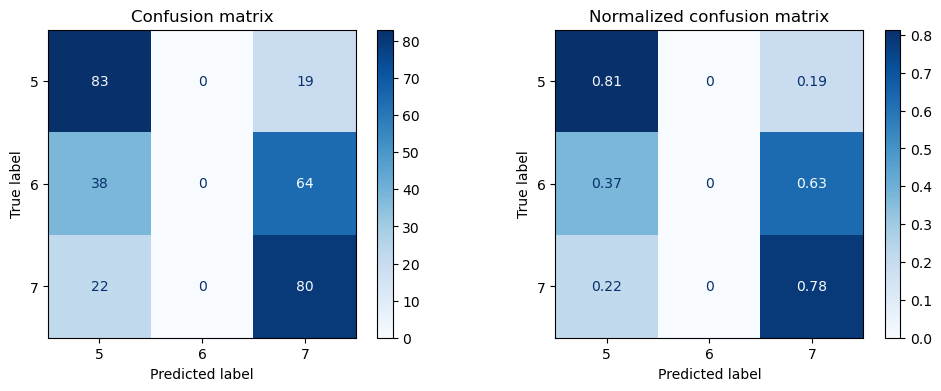

In [19]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)
get_evaluation(y_test, prediction, dtc, X_test)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.561275,9
1,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.521242,15
2,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.561275,9
3,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.526961,13
4,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.561275,9
5,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.440359,17
6,"{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...",0.582516,2
7,"{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...",0.526961,13
8,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.582516,2
9,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.548203,12


오차 행렬
[[75 15 12]
 [31 27 44]
 [ 8 27 67]]
정확도: 0.5523, 정밀도: 0.5313, 재현율: 0.5523, F1: 0.5353
################################################################################


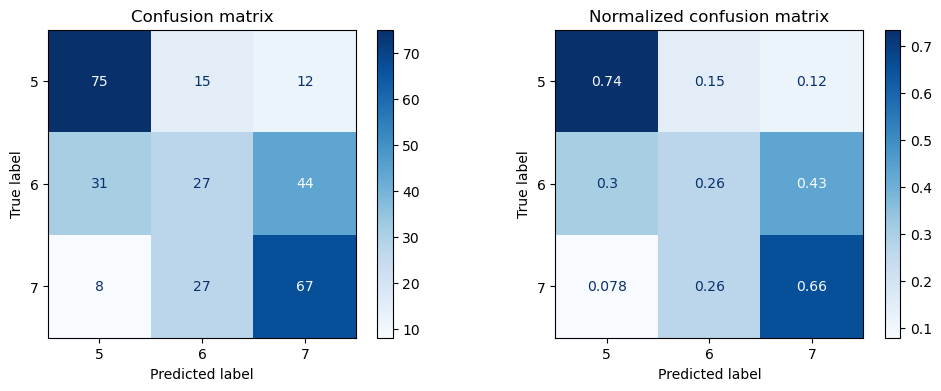

In [121]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

svc = g_svc.best_estimator_
prediction = svc.predict(X_test)
get_evaluation(y_test, prediction, svc, X_test)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.523693,5
1,{'knn__n_neighbors': 5},0.551471,2
2,{'knn__n_neighbors': 7},0.558824,1
3,{'knn__n_neighbors': 9},0.549837,3
4,{'knn__n_neighbors': 11},0.533497,4


오차 행렬
[[69 21 12]
 [34 35 33]
 [12 31 59]]
정확도: 0.5327, 정밀도: 0.5232, 재현율: 0.5327, F1: 0.5264
################################################################################


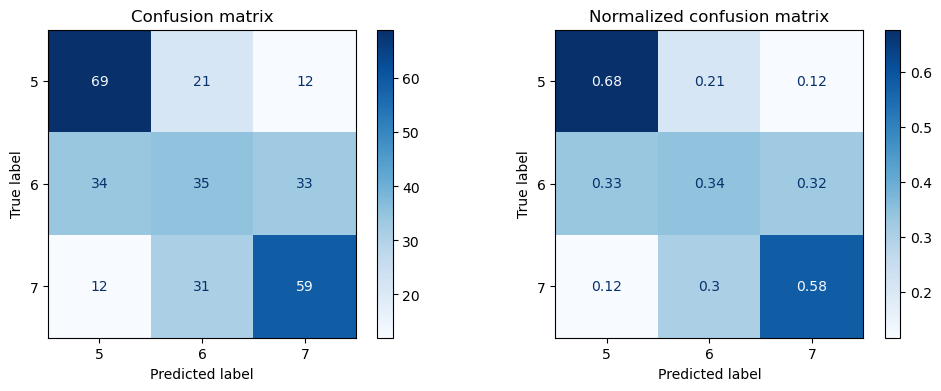

In [122]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

knn_pipe = g_knn.best_estimator_
prediction = knn_pipe.predict(X_test)
get_evaluation(y_test, prediction, knn_pipe, X_test)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.522059,10
1,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.523693,9
2,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.518791,12
3,"{'rfc__max_depth': 1, 'rfc__min_samples_split'...",0.522059,10
4,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.535948,7
5,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.535948,7
6,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.544118,5
7,"{'rfc__max_depth': 2, 'rfc__min_samples_split'...",0.538399,6
8,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.545752,4
9,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.546569,3


오차 행렬
[[81  6 15]
 [36 17 49]
 [19 14 69]]
정확도: 0.5458, 정밀도: 0.5246, 재현율: 0.5458, F1: 0.5042
################################################################################


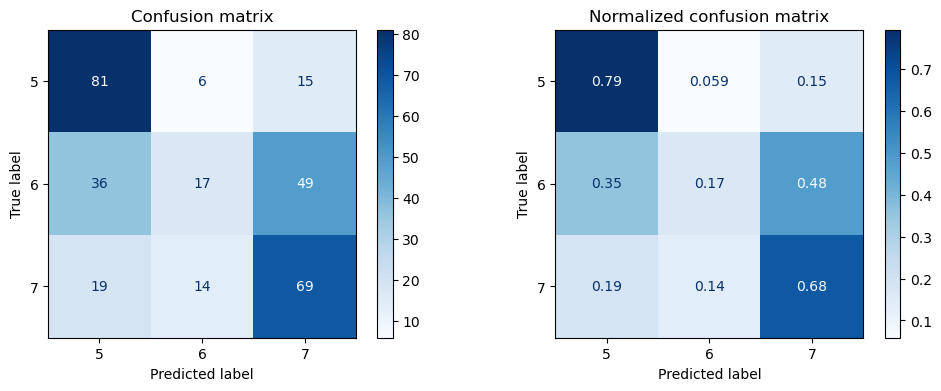

In [123]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

rfc = g_rfc.best_estimator_

prediction = rfc.predict(X_test)
get_evaluation(y_test, prediction, rfc, X_test)

,params,mean_test_score,rank_test_score
0,"{'ada__learning_rate': 0.4, 'ada__n_estimators...",0.566993,1
1,"{'ada__learning_rate': 0.4, 'ada__n_estimators...",0.559641,2
2,"{'ada__learning_rate': 0.4, 'ada__n_estimators...",0.539216,4
3,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.543301,3
4,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.532680,6
5,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.517974,8
6,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.539216,4
7,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.512255,9
8,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.519608,7


오차 행렬
[[71 16 15]
 [26 38 38]
 [10 30 62]]
정확도: 0.5588, 정밀도: 0.5517, 재현율: 0.5588, F1: 0.5532
################################################################################


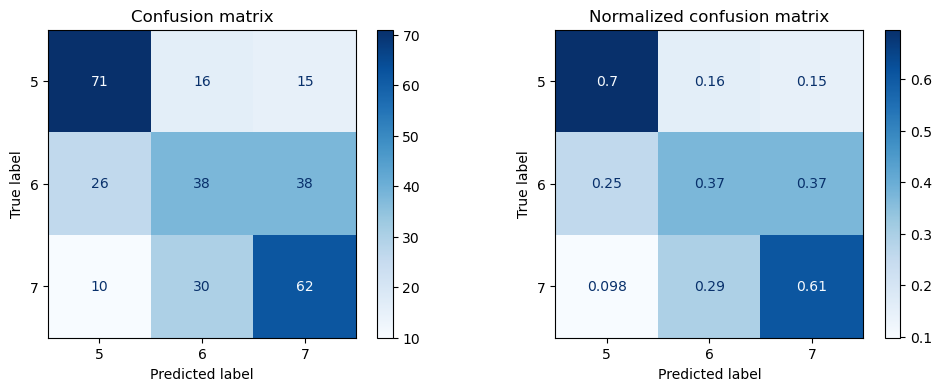

In [124]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)
ada = g_ada.best_estimator_

prediction = ada.predict(X_test)
get_evaluation(y_test, prediction, ada, X_test)

,params,mean_test_score,rank_test_score
0,"{'gbc__learning_rate': 0.4, 'gbc__n_estimators...",0.557190,1
1,"{'gbc__learning_rate': 0.4, 'gbc__n_estimators...",0.530229,7
2,"{'gbc__learning_rate': 0.4, 'gbc__n_estimators...",0.528595,8
3,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.535131,4
4,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.549020,2
5,"{'gbc__learning_rate': 0.7, 'gbc__n_estimators...",0.540033,3
6,"{'gbc__learning_rate': 1, 'gbc__n_estimators':...",0.531863,5
7,"{'gbc__learning_rate': 1, 'gbc__n_estimators':...",0.531046,6
8,"{'gbc__learning_rate': 1, 'gbc__n_estimators':...",0.527778,9


오차 행렬
[[64 27 11]
 [19 45 38]
 [ 6 34 62]]
정확도: 0.5588, 정밀도: 0.5674, 재현율: 0.5588, F1: 0.5617
################################################################################


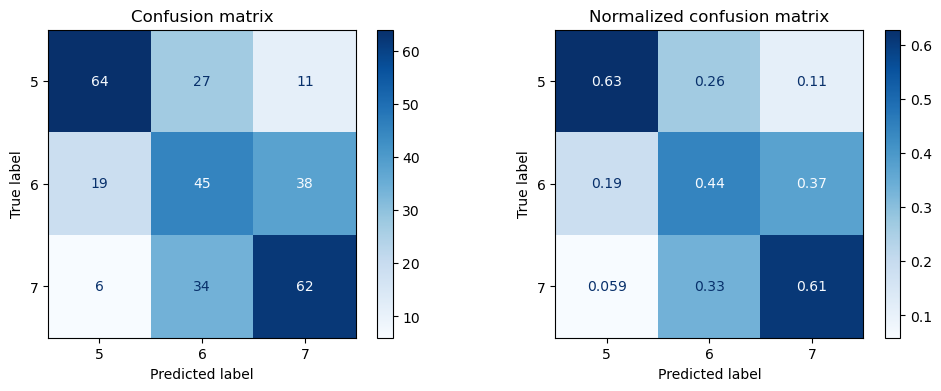

In [125]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)
gbc = g_gbc.best_estimator_

prediction = gbc.predict(X_test)
get_evaluation(y_test, prediction, gbc, X_test)

,params,mean_test_score,rank_test_score
0,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.544935,2
1,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.546569,1
2,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.544118,3
3,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.534314,6
4,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.534314,6
5,"{'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...",0.534314,6
6,"{'lgbm__learning_rate': 1, 'lgbm__n_estimators...",0.536765,5
7,"{'lgbm__learning_rate': 1, 'lgbm__n_estimators...",0.540850,4
8,"{'lgbm__learning_rate': 1, 'lgbm__n_estimators...",0.533497,9


오차 행렬
[[65 28  9]
 [25 43 34]
 [ 4 30 68]]
정확도: 0.5752, 정밀도: 0.5766, 재현율: 0.5752, F1: 0.5751
################################################################################


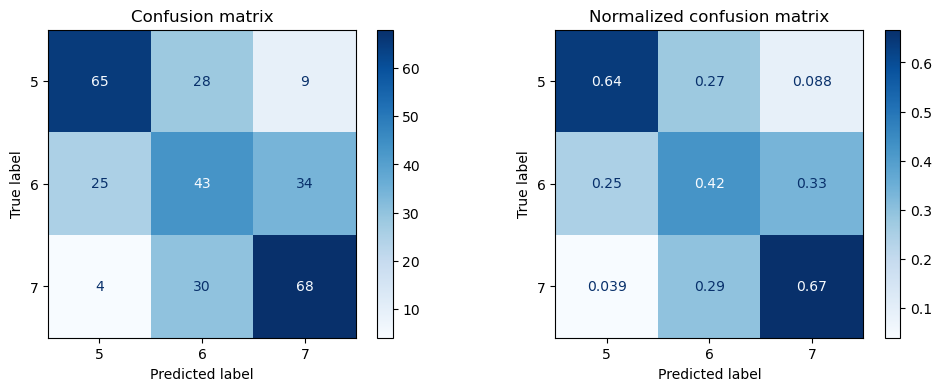

In [126]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)
lgbm = g_lgbm.best_estimator_

prediction = lgbm.predict(X_test)
get_evaluation(y_test, prediction, lgbm, X_test)

오차 행렬
[[80 10 12]
 [37 24 41]
 [13 23 66]]
정확도: 0.5556, 정밀도: 0.5304, 재현율: 0.5556, F1: 0.5296
################################################################################


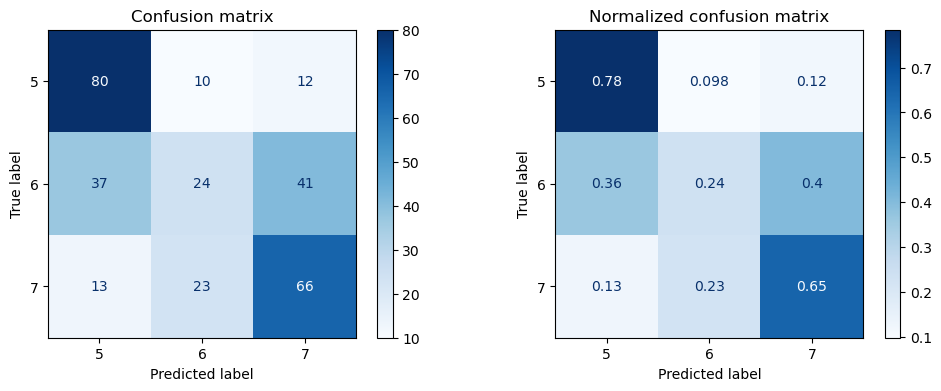

In [128]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('dtc', dtc), 
                             ('knn', knn_pipe), 
                             ('rfc', rfc),('ada', ada),('gbc', gbc),('lgbm', lgbm)], 
                 voting='hard', 
                 n_jobs=-1)
vc.fit(X_train, y_train)
prediction = vc.predict(X_test)
get_evaluation(y_test, prediction, vc, X_test)

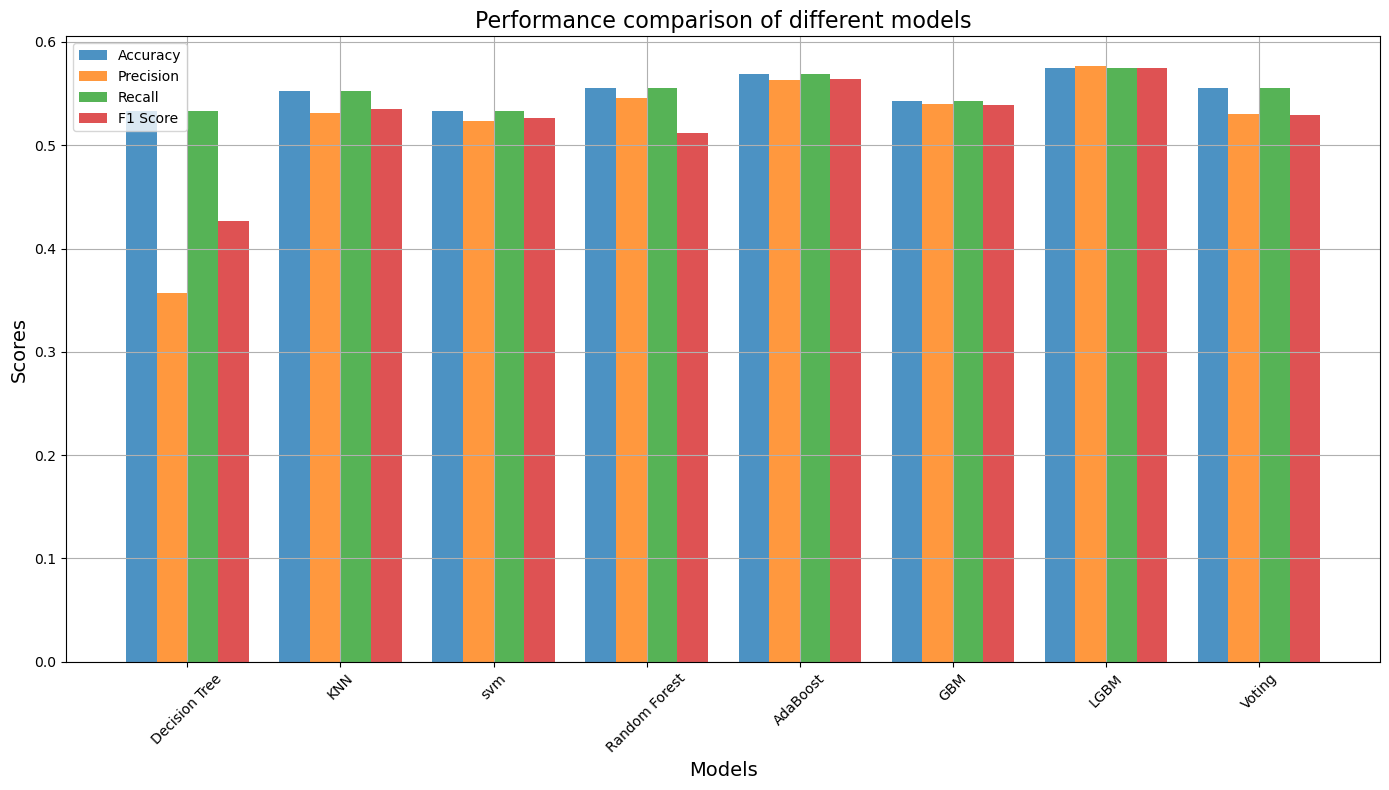

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 모델과 성능 지표를 리스트 형태로 준비
models = [
    "Decision Tree", "KNN",'svm' ,
     "Random Forest", "AdaBoost", 
    "GBM", "LGBM", 'Voting'
]
accuracies = [0.5327, 0.5523, 0.5327, 0.5556, 0.5686, 0.5425, 0.5752, 0.5556]
precisions = [0.3571, 0.5313, 0.5232, 0.5456, 0.5633, 0.5398, 0.5766, 0.5304]
recalls = [0.5327, 0.5523, 0.5327, 0.5556, 0.5686, 0.5425, 0.5752, 0.5556]
f1_scores = [0.4271  , 0.5353  , 0.5264  , 0.5118  , 0.5643  , 0.5394  , 0.5751  , 0.5296 ]

# 데이터를 numpy 배열로 변환
data = np.array([accuracies, precisions, recalls, f1_scores])

# 성능 지표의 이름
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# 그래프 그리기 설정
n_groups = len(models)
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

# 각 지표별로 바 그래프를 그림
for i in range(data.shape[0]):
    plt.bar(index + i*bar_width, data[i], bar_width, alpha=opacity, label=metrics[i])

# 제목, 레이블, 범례 설정
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance comparison of different models', fontsize=16)
plt.xticks(index + 1.5*bar_width, models, rotation=45)
plt.legend()

# 그리드 표시
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


2 Cycle

많이 오르긴 했지만 다른 방법으로 높이는 법 확인 / 모델은 lgbm

In [78]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(g_lgbm, X_test, y_test , n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([10,  1,  3,  6,  7,  0,  2,  4,  5,  9,  8], dtype=int64)

In [79]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{ft.columns[i]}: {round(importance.importances_mean[i], 4)}')


alcohol: 0.0705
volatile acidity: 0.0369
residual sugar: 0.0278
total sulfur dioxide: 0.0256
density: 0.0194
fixed acidity: 0.0174
citric acid: 0.0169
chlorides: 0.0149
free sulfur dioxide: 0.0134
sulphates: 0.0103
pH: 0.0077


In [80]:
corr = ft.corr()
corr[['quality']].sort_values(by='quality', ascending=False)[1:]

,quality
alcohol,0.532862
pH,0.106696
citric acid,0.038421
sulphates,0.008227
fixed acidity,-0.026696
free sulfur dioxide,-0.071762
volatile acidity,-0.133488
residual sugar,-0.176839
total sulfur dioxide,-0.295226
chlorides,-0.355706


In [ ]:
import numpy as np

columns = ['residual sugar',]
ft[columns] = np.log1p(ft[columns]) 


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

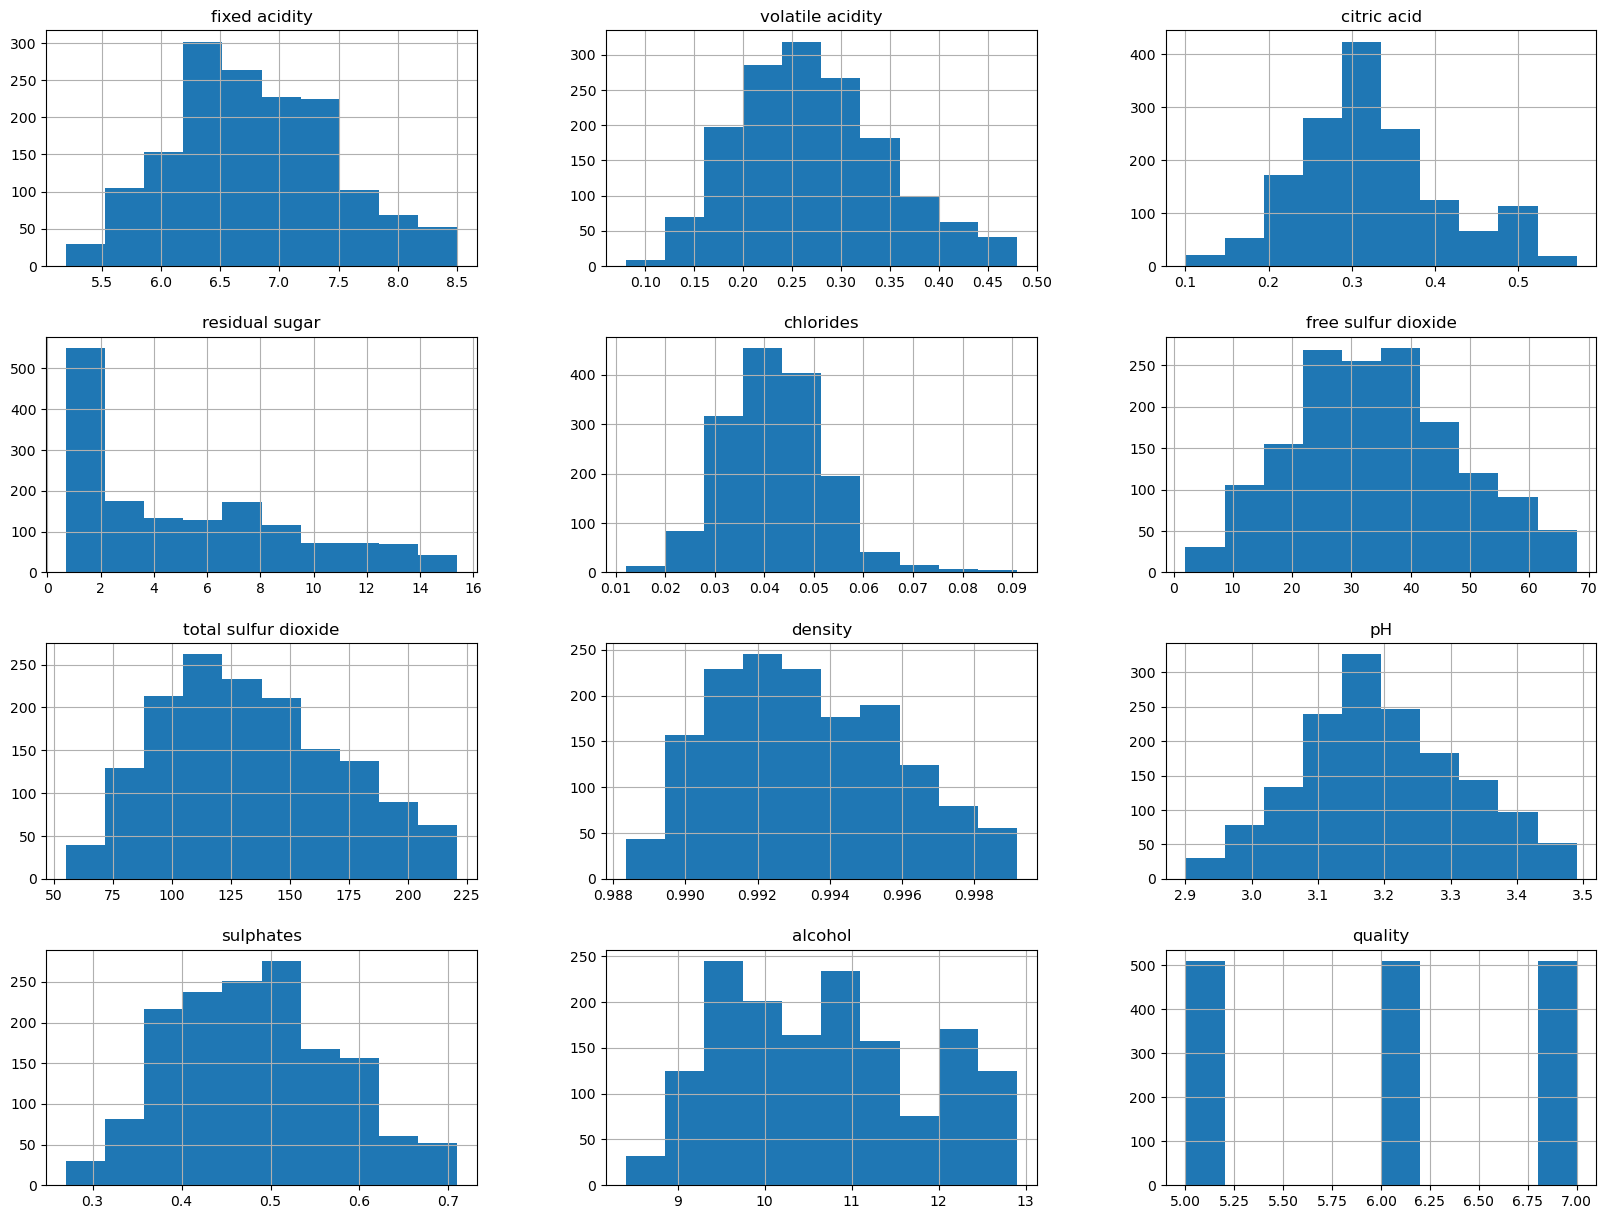

In [82]:
ft.hist(figsize=(20,15))

In [83]:
import numpy as np

columns = ['alcohol','residual sugar']
ft[columns] = np.log1p(ft[columns]) 


In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

features, targets = ft.iloc[:, :-1], ft.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# smote = SMOTE(k_neighbors=3, random_state=124)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dtc.fit(X_train_over.values, y_train_over.values)



evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

# y_train_over.value_counts()

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

lgbm_parameters = {
    'lgbm__n_estimators': [ 20,40,70,100],
    'lgbm__learning_rate': [0.2,0.4, 0.6, 1]
}


lgbm = LGBMClassifier()

lgbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('lgbm', lgbm)])
g_lgbm = GridSearchCV(lgbm_pipe, param_grid=lgbm_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)



In [86]:
g_lgbm.fit(X_train, y_train, lgbm__eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 1224, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.2, 0.4, 0.6, 1],
                         'lgbm__n_estimators': [20, 40, 70, 100]},
             return_train_score=True)

,params,mean_test_score,rank_test_score
0,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.556373,1
1,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.555556,2
2,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.547386,8
3,"{'lgbm__learning_rate': 0.2, 'lgbm__n_estimato...",0.549837,5
4,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.549837,5
5,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.550654,3
6,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.550654,3
7,"{'lgbm__learning_rate': 0.4, 'lgbm__n_estimato...",0.549837,5
8,"{'lgbm__learning_rate': 0.6, 'lgbm__n_estimato...",0.537582,13
9,"{'lgbm__learning_rate': 0.6, 'lgbm__n_estimato...",0.541667,12


오차 행렬
[[72 18 12]
 [22 49 31]
 [ 5 31 66]]
정확도: 0.6111, 정밀도: 0.6109, 재현율: 0.6111, F1: 0.6107
################################################################################


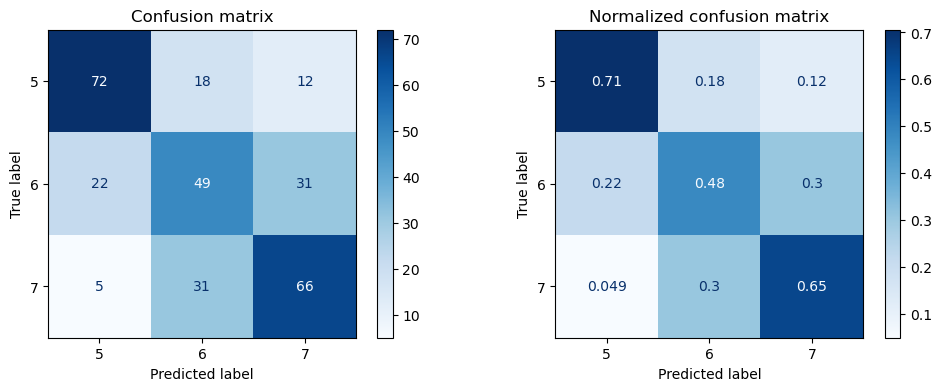

In [87]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)
lgbm = g_lgbm.best_estimator_

prediction = lgbm.predict(X_test)
get_evaluation(y_test, prediction, lgbm, X_test)

3 Cycle

튜닝, loh1p를 통해 f1 score 0.6 이상으로 높임